# WeatherPy

---

## Code to Generate Random Geographic Coordinates and a List of Cities

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [55]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 595
['waitangi', 'freetown', 'perryville', 'petropavlovsk-kamchatsky', "ust'-kulom", 'bethel', 'hobyo', 'nanao', 'ashtabula', 'blackmans bay', 'zakynthos', 'grytviken', 'bredasdorp', 'dalbandin', 'prince rupert', 'tiksi', 'shimanovsk', 'genhe', 'iqaluit', 'sinabang', 'puerto natales', 'port-aux-francais', 'northam', 'montepuez', 'ushuaia', 'loudi', 'demopolis', 'udachny', 'port mathurin', 'susuman', 'kanggye', 'talnakh', 'qaqortoq', 'longjiang', 'sorel-tracy', 'edinburgh of the seven seas', 'faya-largeau', 'grand gaube', 'castillos', 'la passe', 'adamstown', 'alo', 'college', 'bilibino', 'isafjordur', 'margaret river', 'whitehorse', 'invercargill', 'alofi', 'olonkinbyen', 'sisimiut', 'chulakkurgan', 'fada', 'urengoy', 'saint-philippe', 'ixtapa', 'nagqu', 'punta arenas', 'ribeira grande', 'enewetak', 'mezhdurechenskiy', 'aripuana', 'shindand', 'perieni', 'gisborne', 'ilulissat', 'tocoa', 'yellowknife', 'kulia village', 'west island', 'motueka', "kamen'-rybo

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | freetown
Processing Record 3 of Set 1 | perryville
Processing Record 4 of Set 1 | petropavlovsk-kamchatsky
Processing Record 5 of Set 1 | ust'-kulom
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | hobyo
Processing Record 8 of Set 1 | nanao
Processing Record 9 of Set 1 | ashtabula
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | zakynthos
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | dalbandin
Processing Record 15 of Set 1 | prince rupert
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | shimanovsk
Processing Record 18 of Set 1 | genhe
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | sinabang
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | port-aux-francais
Processin

In [60]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [61]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,14.34,79,27,1.79,NZ,1738817759
1,freetown,8.4840,-13.2299,25.84,78,40,2.06,SL,1738817760
2,perryville,37.7242,-89.8612,6.62,100,100,1.54,US,1738817762
3,petropavlovsk-kamchatsky,53.0452,158.6483,-1.67,47,75,4.00,RU,1738817763
4,ust'-kulom,61.6864,53.6902,-19.76,100,74,1.12,RU,1738817764


In [62]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [63]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.34,79,27,1.79,NZ,1738817759
1,freetown,8.4840,-13.2299,25.84,78,40,2.06,SL,1738817760
2,perryville,37.7242,-89.8612,6.62,100,100,1.54,US,1738817762
3,petropavlovsk-kamchatsky,53.0452,158.6483,-1.67,47,75,4.00,RU,1738817763
4,ust'-kulom,61.6864,53.6902,-19.76,100,74,1.12,RU,1738817764


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

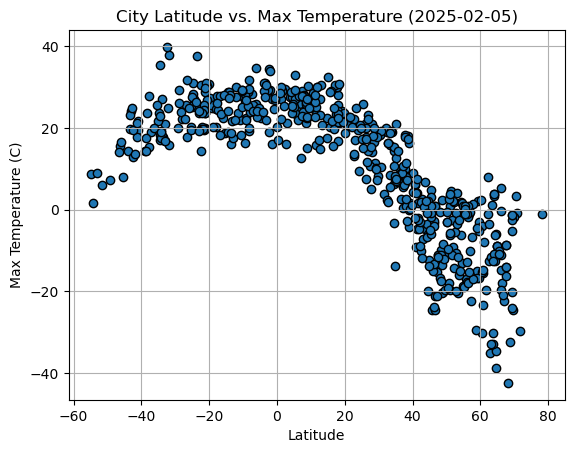

In [64]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2025-02-05)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

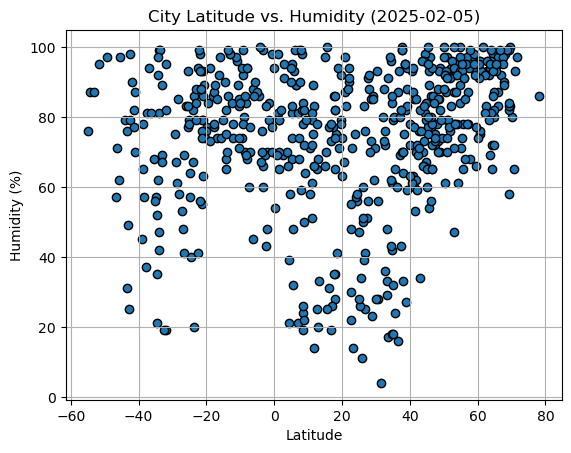

In [65]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2025-02-05)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

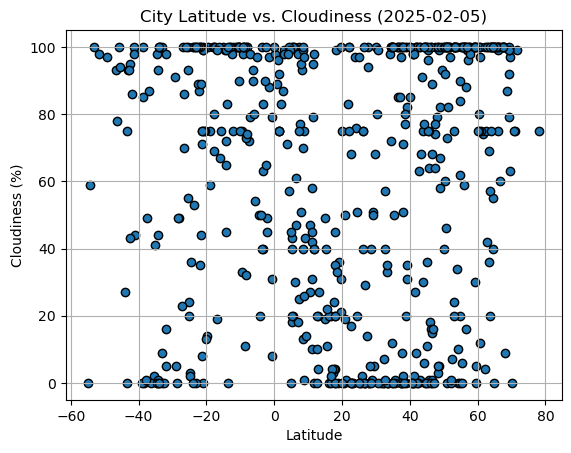

In [66]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2025-02-05)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

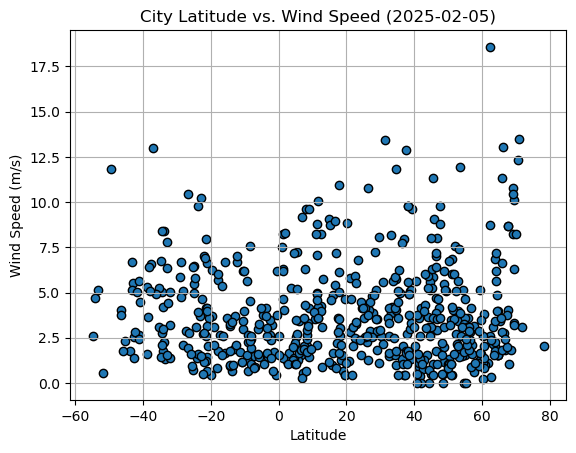

In [67]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2025-02-05)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Define a function to create Linear Regression plots
def calc_linregress(x, y):
    return linregress(x,y)

In [69]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0].copy()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,freetown,8.4840,-13.2299,25.84,78,40,2.06,SL,1738817760
2,perryville,37.7242,-89.8612,6.62,100,100,1.54,US,1738817762
3,petropavlovsk-kamchatsky,53.0452,158.6483,-1.67,47,75,4.00,RU,1738817763
4,ust'-kulom,61.6864,53.6902,-19.76,100,74,1.12,RU,1738817764
5,bethel,41.3712,-73.4140,-4.69,60,0,0.89,US,1738817765


In [70]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.34,79,27,1.79,NZ,1738817759
9,blackmans bay,-43.0167,147.3167,24.18,49,93,5.54,AU,1738817770
11,grytviken,-54.2811,-36.5092,1.70,87,59,4.69,GS,1738817772
12,bredasdorp,-34.5322,20.0403,18.22,52,98,2.75,ZA,1738817773
20,puerto natales,-51.7236,-72.4875,6.04,95,98,0.53,CL,1738817809


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.7372869960545211


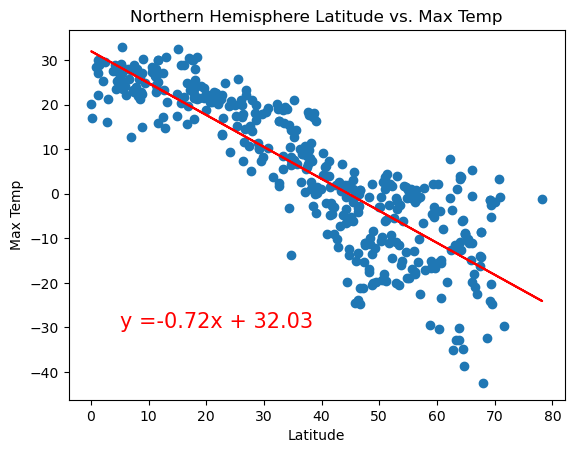

In [71]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
nh_slope, nh_int, nh_r, nh_p, nh_std = calc_linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
nh_fit = nh_slope * northern_hemi_df["Lat"] + nh_int
print(f"The r^2 value is: {pow(nh_r,2)}")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere Latitude vs. Max Temp")
line_eq = "y =" + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
plt.annotate(line_eq,(5,-30),fontsize=15, color="r")
plt.plot(northern_hemi_df["Lat"], nh_fit, color="r")
# Show plot
plt.show()

The r^2 value is: 0.27626180002253237


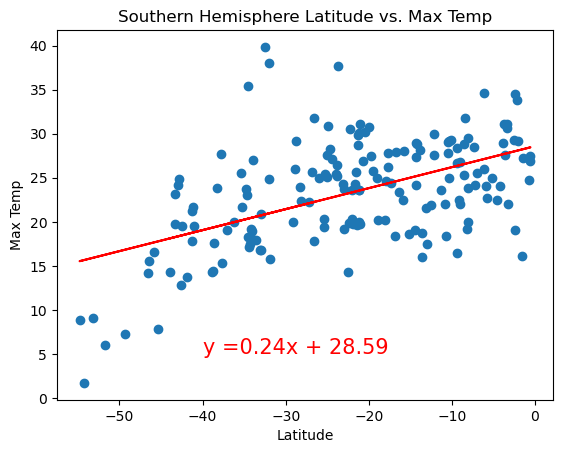

In [72]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
sh_slope, sh_int, sh_r, sh_p, sh_std = calc_linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
sh_fit = sh_slope * southern_hemi_df["Lat"] + sh_int
print(f"The r^2 value is: {pow(sh_r,2)}")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere Latitude vs. Max Temp")
plt.plot(southern_hemi_df["Lat"], sh_fit, color="r")
line_eq = "y =" + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))
plt.annotate(line_eq,(-40,5),fontsize=15, color="r")
# Show plot
plt.show()

**Discussion about the linear relationship:** The closer a latitude is to the equator, or latitude 0, the higher the maximum temperature is. The further a latitude is to the equator, the lower the maximum temperature is.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.14192451234803746


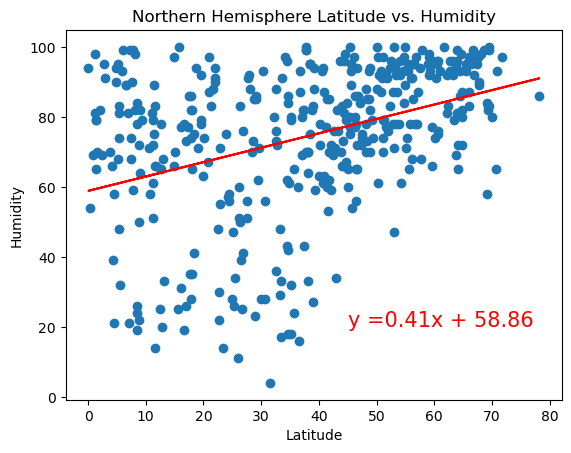

In [76]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
nh_slope, nh_int, nh_r, nh_p, nh_std = calc_linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
nh_fit = nh_slope * northern_hemi_df["Lat"] + nh_int
print(f"The r^2 value is: {pow(nh_r,2)}")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Latitude vs. Humidity")
line_eq = "y =" + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
plt.annotate(line_eq,(45,20),fontsize=15, color="r")
plt.plot(northern_hemi_df["Lat"], nh_fit, color="r")
# Show plot
plt.show()

The r^2 value is: 0.034515049440586684


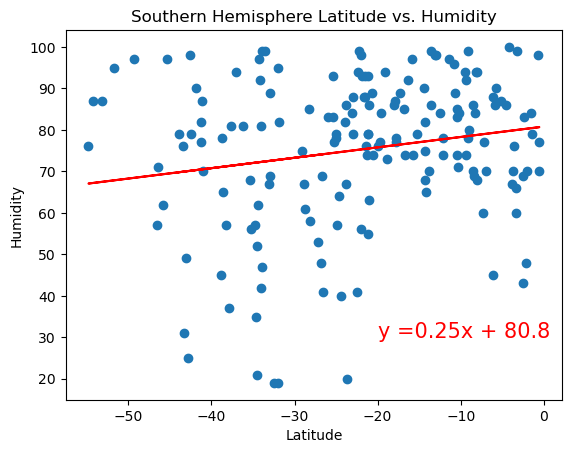

In [78]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
sh_slope, sh_int, sh_r, sh_p, sh_std = calc_linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
sh_fit = sh_slope * southern_hemi_df["Lat"] + sh_int
print(f"The r^2 value is: {pow(sh_r,2)}")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.plot(southern_hemi_df["Lat"], sh_fit, color="r")
line_eq = "y =" + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))
plt.annotate(line_eq,(-20,30),fontsize=15, color="r")
# Show plot
plt.show()

**Discussion about the linear relationship:** As the latitude increase, the humidity gradually increases

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.060094045377950864


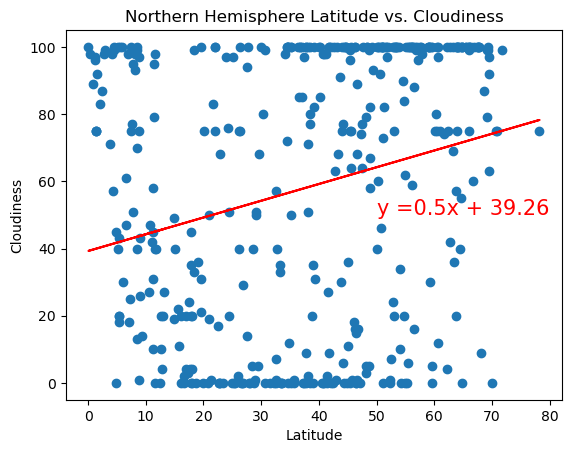

In [81]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
nh_slope, nh_int, nh_r, nh_p, nh_std = calc_linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
nh_fit = nh_slope * northern_hemi_df["Lat"] + nh_int
print(f"The r^2 value is: {pow(nh_r,2)}")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
line_eq = "y =" + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
plt.annotate(line_eq,(50,50),fontsize=15, color="r")
plt.plot(northern_hemi_df["Lat"], nh_fit, color="r")
# Show plot
plt.show()

The r^2 value is: 0.030543378215677867


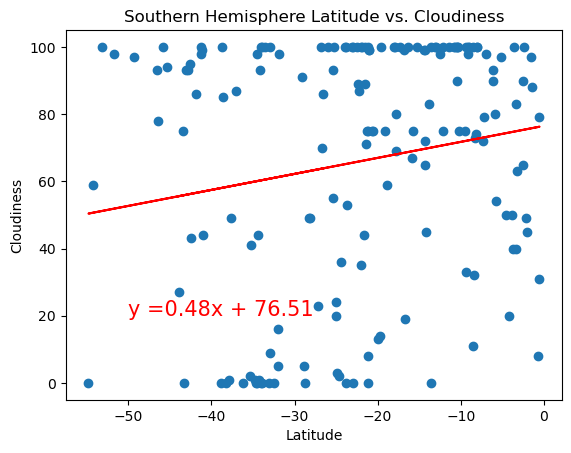

In [82]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
sh_slope, sh_int, sh_r, sh_p, sh_std = calc_linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
sh_fit = sh_slope * southern_hemi_df["Lat"] + sh_int
print(f"The r^2 value is: {pow(sh_r,2)}")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.plot(southern_hemi_df["Lat"], sh_fit, color="r")
line_eq = "y =" + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))
plt.annotate(line_eq,(-50,20),fontsize=15, color="r")
# Show plot
plt.show()

**Discussion about the linear relationship:** As latitude increases, cloudiness increases

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.00015124578828411576


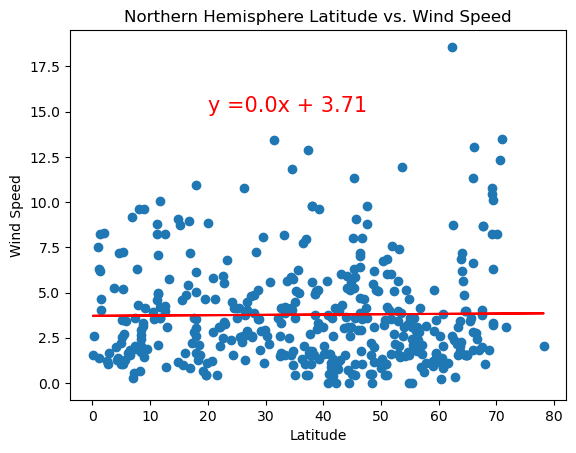

In [87]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
nh_slope, nh_int, nh_r, nh_p, nh_std = calc_linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
nh_fit = nh_slope * northern_hemi_df["Lat"] + nh_int
print(f"The r^2 value is: {pow(nh_r,2)}")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
line_eq = "y =" + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
plt.annotate(line_eq,(20,15),fontsize=15, color="r")
plt.plot(northern_hemi_df["Lat"], nh_fit, color="r")
# Show plot
plt.show()

The r^2 value is: 0.06885191543649687


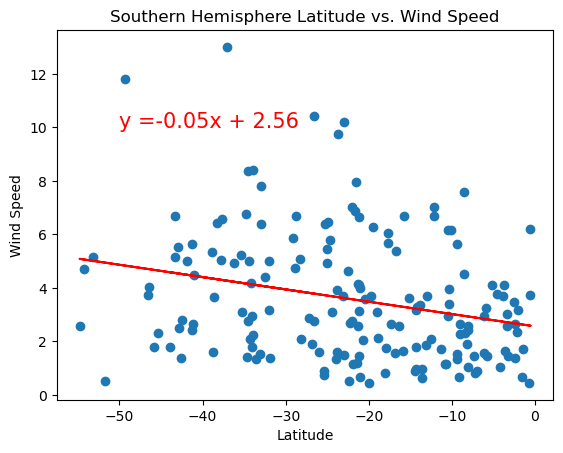

In [88]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
sh_slope, sh_int, sh_r, sh_p, sh_std = calc_linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
sh_fit = sh_slope * southern_hemi_df["Lat"] + sh_int
print(f"The r^2 value is: {pow(sh_r,2)}")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.plot(southern_hemi_df["Lat"], sh_fit, color="r")
line_eq = "y =" + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))
plt.annotate(line_eq,(-50,10),fontsize=15, color="r")
# Show plot
plt.show()

**Discussion about the linear relationship:** The relationship between latitude and wind speed is very weak, meaning latitude has very little impact on wind speed.